### Importo as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as dt
import matplotlib.pyplot as plt

### Importo os dados dos setores

In [2]:
# Importo a plan com os dados do ibrx
ibrx = pd.read_csv('ibrx2020.csv')

# Transformo em uma lista
all_tickers = list(ibrx['Ativo'])

### Puxo os dados do yahoo

In [3]:
%%time
# Defino qual será a data de início dos dataframes de preços
start_date = '2019-01-01'

# Crio um dicionário que irá conter a série de preços de cada ação
prices = pd.DataFrame()

# Pego apenas a coluna Adjusted Close porque é o que me interessa
errors = []
for s in range(0, len(all_tickers)):
    try:
        prices[all_tickers[s]] = dt.DataReader(all_tickers[s], start=start_date, data_source='yahoo')['Adj Close']
    except:
        errors.append(all_tickers[s])  
        pass

Wall time: 1min 45s


In [4]:
# Pego os dados do ibovespa
ibov = dt.DataReader('^BVSP', start=start_date, data_source='yahoo')['Adj Close']    

### Tratando a base de dados

In [5]:
# Crio uma função que preenche dados vazios
def fill_values(df):
    if isinstance(ibov, pd.Series):
        init = df.first_valid_index()
        end = df.last_valid_index()
        df.loc[init:end]=df.loc[init:end].fillna(method='ffill')
    else:    
        for i in df.columns.values:
            init = df[i].first_valid_index()
            end = df[i].last_valid_index()
            df[i].loc[init:end]=df[i].loc[init:end].fillna(method='ffill')

In [6]:
# Preencho os valores descontinuos de precos
fill_values(prices)
fill_values(ibov) 

### Rodando o modelo

In [53]:
date = '02-03-2020'
end_date = pd.to_datetime('today')
df = (prices[date:]/prices[date:].iloc[0])-1

In [56]:
ranked_return = df.tail(1).dropna(axis=1).T.sort_values(by='2021-02-18')['2021-02-18']

No handles with labels found to put in legend.


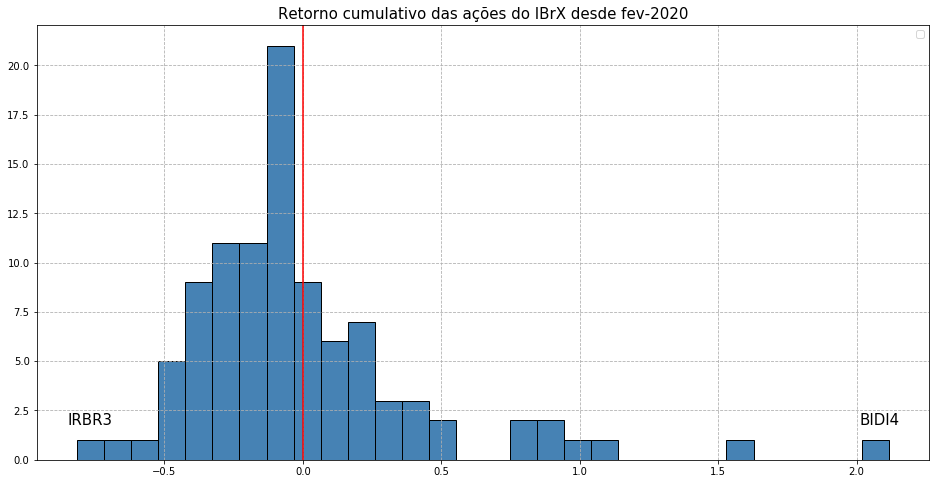

In [103]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(ranked_return, bins=30, edgecolor='black', color='steelblue')
ax.legend(loc='best')
ax.set_title('Retorno cumulativo das ações do IBrX desde fev-2020', fontsize=15)
ax.grid(linestyle='--')
ax.annotate('BIDI4', xy=(2.01, 1.8), fontsize=15)
ax.annotate('IRBR3', xy=(-0.85, 1.8), fontsize=15)
plt.axvline(x=0, linestyle='-', color='red')
plt.show()

In [72]:
ranked_return.tail(10)

USIM5.SA    0.544142
ENEV3.SA    0.551616
BRAP4.SA    0.779313
MGLU3.SA    0.810005
SUZB3.SA    0.871139
PRIO3.SA    0.877423
VALE3.SA    0.976990
WEGE3.SA    1.047582
CSNA3.SA    1.597580
BIDI4.SA    2.116519
Name: 2021-02-18 00:00:00, dtype: float64

In [73]:
ranked_return.head(10)

IRBR3.SA   -0.815321
COGN3.SA   -0.636910
AMAR3.SA   -0.586283
BRML3.SA   -0.512336
ALSO3.SA   -0.507203
CIEL3.SA   -0.491919
CVCB3.SA   -0.481997
CNTO3.SA   -0.452844
MULT3.SA   -0.396982
YDUQ3.SA   -0.390212
Name: 2021-02-18 00:00:00, dtype: float64

In [8]:
(df.tail(1)[df.tail(1)>1].dropna(axis=1).mean(axis=1))-1

Date
2021-02-18    0.426583
dtype: float64

In [9]:
(df.tail(1)[df.tail(1)<1].dropna(axis=1).mean(axis=1))-1

Date
2021-02-18   -0.230661
dtype: float64

In [10]:
ibov[date:]/ibov[date:].iloc[0]

Date
2020-02-03    1.000000
2020-02-04    1.008096
2020-02-05    1.012205
2020-02-06    1.004894
2020-02-07    0.992506
                ...   
2021-02-09    1.041874
2021-02-10    1.033159
2021-02-11    1.040182
2021-02-12    1.039144
2021-02-18    1.038100
Name: Adj Close, Length: 255, dtype: float64

In [11]:
df.tail(1).mean(axis=1)

Date
2021-02-18    0.997362
dtype: float64

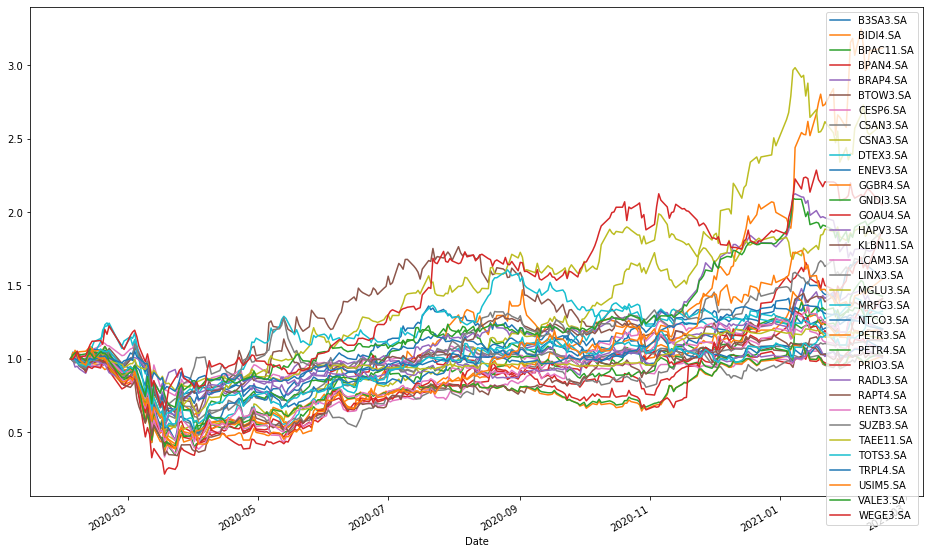

In [12]:
df[date:][win_tickers].plot(figsize=(16,10))

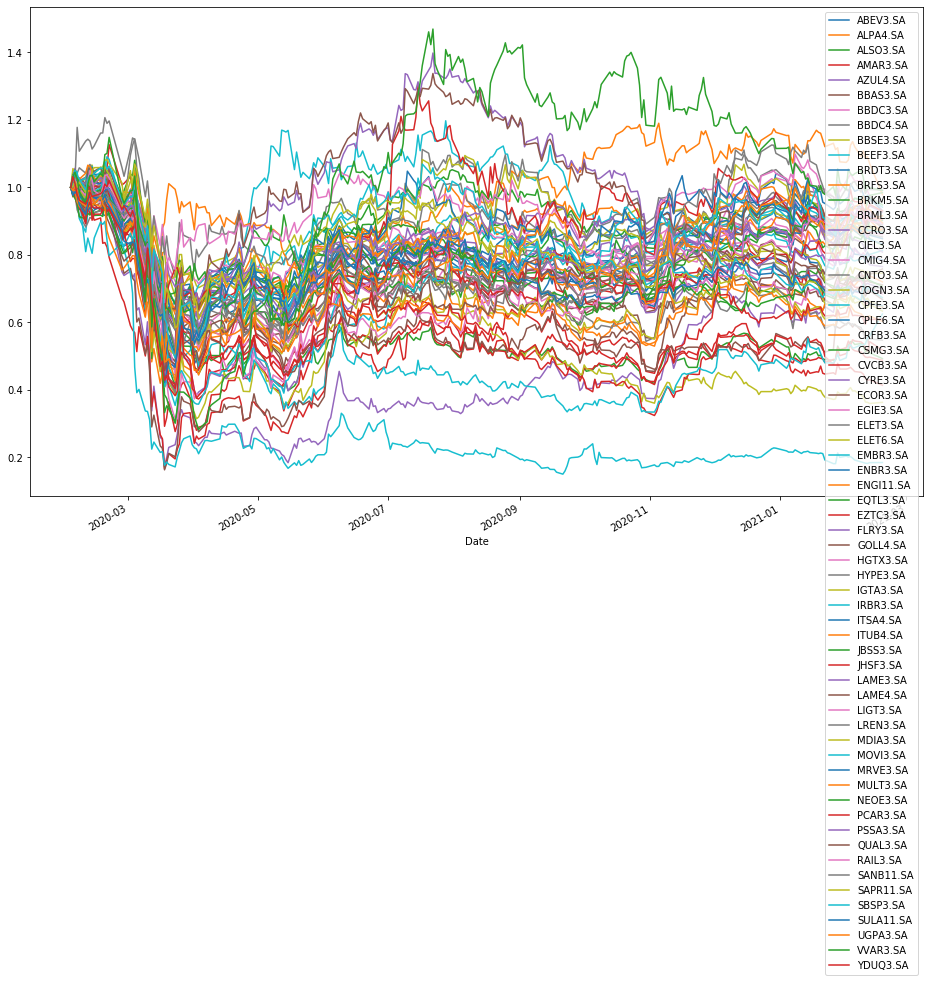

In [13]:
df[date:][los_tickers].plot(figsize=(16,10))

In [14]:
df.tail(1)[df.tail(1)<1].dropna(axis=1).count(axis=1)

Date
2021-02-18    64
dtype: int64

c:\users\felipe\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\felipe\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


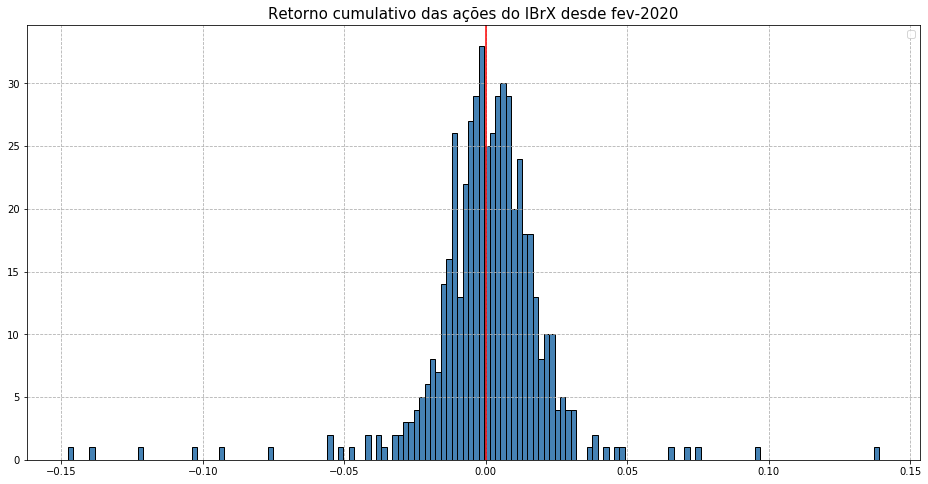

In [120]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(ibov.pct_change(), bins=150, edgecolor='black', color='steelblue')
ax.legend(loc='best')
ax.set_title('Retorno cumulativo das ações do IBrX desde fev-2020', fontsize=15)
ax.grid(linestyle='--')
plt.axvline(x=0, linestyle='-', color='red')
plt.show()

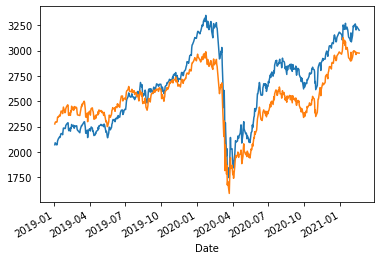

In [128]:
prices.sum(axis=1).plot()
(ibov/40).plot()